<a href="https://colab.research.google.com/github/Pritchardcodeonly/annotated_deep_learning_paper_implementations/blob/master/version20230901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'numpy.ndarray'>
[[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]
<class 'numpy.ndarray'>
[1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 1 0 0 0 

SOTT正在疯狂运作中，老爷您休息会！！-----------------(1000/1000)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
y_true type: <class 'numpy.ndarray'>
y_pred type: <class 'numpy.ndarray'>
评估指标:
准确率: 0.5302
精确率: 0.9627
召回率: 0.9627
F1值: 0.9627


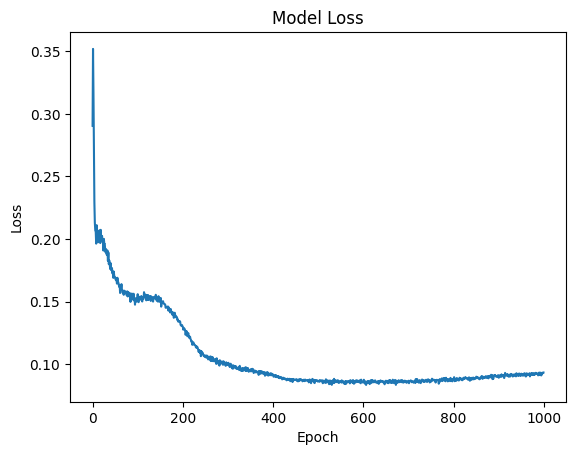

训练完成
Network Architecture:
Layer 1: FullyConnectedLayer
   Input Dimension: 30
   Output Dimension: 16
   Batch Normalize: False

Layer 2: Activation
   Activation Function: relu

Layer 3: FullyConnectedLayer
   Input Dimension: 16
   Output Dimension: 1
   Batch Normalize: False

Layer 4: Activation
   Activation Function: sigmoid



In [1]:
from SOTT_NN import NN_us
from NetworkInformation import print_network_architecture
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加载数据
data = load_breast_cancer()
X, y = data.data, data.target

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train.shape)
print(type(X_train))
print(X_train)
print(type(y_train))
print(y_train)

nn = NN_us()

nn.compile(optimizer='adam', learning_rate=0.001, loss='binary_crossentropy')

nn.add_layer(input_dim= X_train.shape[1], output_dim=16)
nn.add_activation('relu')
nn.add_layer(16,1)
nn.add_activation('sigmoid')

nn.fit(X_train, y_train, batch_size=1, epochs=1000)

y_pred = nn.forward(X_test)
print(type(y_pred))
print(type(y_test))
nn.evaluate_metrics(y_test, y_pred)

nn.loss_show()

print_network_architecture(nn)